# A Study of Methods for Recommending Movies

## Synopsis

In this notebook we explore two current methods for generating recommendations on the domain of movies. We provide a prospective business user with a multifacited analysis of the differences between methods and suggest optimal use cases from these results.

Keywords: Machine Learning; Collaborative Filtering; Matrix Factorization

#### Contributors:
- Ek Itoku | UNI: ii2155 | Email: ii2155@columbia.edu
- Jason Kuo | UNI: jk4097 | Email: jk4097@columbia.edu
- Sean Xu | UNI: cx2118 | Email: cx2118@columbia.edu


#### Report Layout:

* Objectives
* Recommendation Approaches
* Evaluation Metrics
* Analysis of Results
    + Comparison of Training Data Size
    + Comparison of Hyperparameter Tuning
* Implementation Considerations
* References
* Appendix

In [16]:
# Import all the necessary packages and modules
import numpy as np
import pickle
import pandas as pd
from source.utils import plot_lines, create_quantile_bucket
pd.options.display.float_format = '{:4.2f}'.format
%matplotlib inline

# Neighborhood-based file paths
path_nb_50k_dist_rmse_user, path_nb_50k_dist_rmse_movie = './data/results/NB_50_Dist_RMSE_User.pkl', './data/results/NB_50_Dist_RMSE_Movie.pkl'
path_nb_100k_dist_rmse_user, path_nb_100k_dist_rmse_movie = './data/results/NB_100_Dist_RMSE_User.pkl', './data/results/NB_100_Dist_RMSE_Movie.pkl'
path_nb_150k_dist_rmse_user, path_nb_150k_dist_rmse_movie = './data/results/NB_150_Dist_RMSE_User.pkl', './data/results/NB_150_Dist_RMSE_Movie.pkl'
path_nb_50k_dist_precision_movie, path_nb_100k_dist_precision_movie = './data/results/NB_50_Dist_Precision_Movie.pkl', './data/results/NB_100_Dist_Precision_Movie.pkl'
path_nb_150k_dist_precision_movie = './data/results/NB_150_Dist_Precision_Movie.pkl'
path_nb_100k_hyper_rmse, path_nb_100k_hyper_precision = './data/results/NB_100_Hyper_RMSE.pkl', './data/results/NB_100_Hyper_Precision.pkl'
#path_nb_50k_hyper_rmse, path_nb_50k_hyper_precision = './data/results/NB_50_Hyper_RMSE.pkl', './data/results/NB_50_Hyper_Precision.pkl'
#path_nb_150k_hyper_rmse, path_nb_150k_hyper_precision = './data/results/NB_150_Hyper_RMSE.pkl', './data/results/NB_150_Hyper_Precision.pkl'
path_nb_result = './data/results/NB_result.pkl'


# Model-based ALS file paths
path_als_50k_dist_rmse_user, path_als_50k_dist_rmse_movie = './data/results/ALS_50_Dist_RMSE_User.pkl', './data/results/ALS_50_Dist_RMSE_Movie.pkl'
path_als_100k_dist_rmse_user, path_als_100k_dist_rmse_movie = './data/results/ALS_100_Dist_RMSE_User.pkl', './data/results/ALS_100_Dist_RMSE_Movie.pkl'
path_als_150k_dist_rmse_user, path_als_150k_dist_rmse_movie = './data/results/ALS_150_Dist_RMSE_User.pkl', './data/results/ALS_150_Dist_RMSE_Movie.pkl'
path_als_50k_dist_precision_movie, path_als_100k_dist_precision_movie = './data/results/ALS_50_Dist_Precision_Movie.pkl', './data/results/ALS_100_Dist_Precision_Movie.pkl'
path_als_150k_dist_precision_movie = './data/results/ALS_150_Dist_Precision_Movie.pkl'
path_als_100k_hyper_rmse = './data/results/ALS_100_Hyper_RMSE.pkl'
#path_als_50k_hyper_rmse, path_als_150k_hyper_rmse = './data/results/ALS_50_Hyper_RMSE.pkl', './data/results/ALS_150_Hyper_RMSE.pkl'
path_als_result = './data/results/ALS_result.pkl'

# Constants
DEFAULT_SAMPLE_SIZE = 100
CV_K_FOLDS = 3
QUANTILES = 10

___

## Objectives

For this study we aim to provide for every user a set of 5 recommended movies that we predict they will like. This is established in two 

You will build two very simple collaborative filtering models. You may use published packages or
methods (e.g. the ALS method in Spark ML) - the goal of this exercise is to gain a practical
intuition for how these types of common models work, and to develop methods to test and
explore them.
Treat this as a case study and think about it from a business perspective. Imagine that you work
for a digital media company that needs to recommend movies. What is your objective? What are
you trying to optimizing and what are you willing to sacrifice? This framework and these
decisions should be clear in your report.

## Recommendation Approaches

We looked into collaborative filtering and matrix factorization methods to generate predicted user rating for a given movie. 

### Most Popular (Baseline Method)

Discuss here


### Collaborative Filtering (Neighborhood-based Method)

Memory-based collaborative filtering is an neighborhood method in which all recorded user and items interactions are used to generate a prediction. The method identifies a set of 'neighbors' that historically express similar preferences for a given user using a similarity metric. The prediction is thus made for a given user-item by taking a weighted average of preferences across neighbor users.

[image]


### Matrix Factorization (Model-based Method)

Instead of having to load up the entire database to make a new recommendation for a user, we can employ a representation of the user-item database in a set of two smaller rank matricies across a shared latent vector space. The two matricies can be combined to recover the initial interactions in addition to infering predictions from missing interactions.

[image]


## Evaluation Metrics

To achieve our objective, we used two different evaluation schemes.


### Root Mean Squared Error (Primary Benchmark)


Any gotchas

### Precision of Top-K (Secondary Benchmark)

Any gotchas

Need to describe handling multiple ratings at #1.

## Experiment Setup


### Data Pipeline

[flowchart]




### Sampling Methodology

We start by sampling 100k user-movie pairs to ensure an adequate coverage of users and movies. We remove




###

## Analysis of Results


### Model Accuracy

#### Baseline (Most Popular 5 Movies)

In our baseline method we achieved a RMSE of 1.006 and precision of 0.0337 on the test data.

#### Neighborhood-Based

In [17]:
with open(path_nb_result, 'rb') as f:
    nb_result = pickle.load(f)

test_acc = nb_result.loc[nb_result.sample_size == DEFAULT_SAMPLE_SIZE, ['rmse_test', 'top_k_precision_test']].values[0]

print("In our neighborhood-based method we achieved a RMSE of {0} and precision of {1} on the test data."
      .format(round(test_acc[0],4), round(test_acc[1],4)))

In our neighborhood-based method we achieved a RMSE of 0.9383 and precision of 0.527 on the test data.


Discuss here

#### Model-Based

In [18]:
with open(path_als_result, 'rb') as f:
    als_result = pickle.load(f)
    
test_acc = als_result.loc[als_result.sample_size == DEFAULT_SAMPLE_SIZE, ['rmse_test', 'top_k_precision_test']].values[0]

print("In our model-based method we achieved a RMSE of {0} and precision of {1} on the test data."
      .format(round(test_acc[0],4), round(test_acc[1],4)))

In our model-based method we achieved a RMSE of 0.9213 and precision of 0.9566 on the test data.


Discuss here

### Comparison of Training Data Size (50k, 100k, 150k)

#### Neighborhood-Based

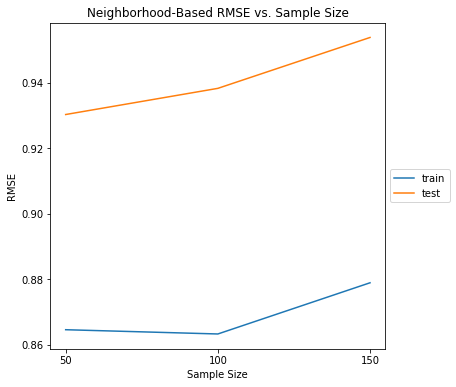

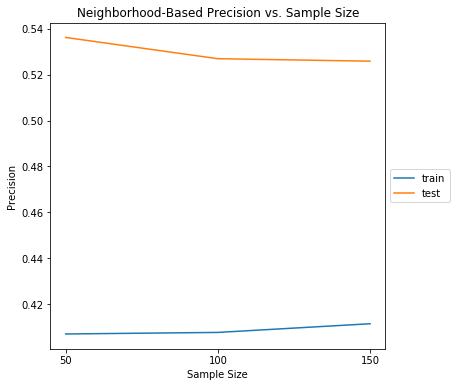

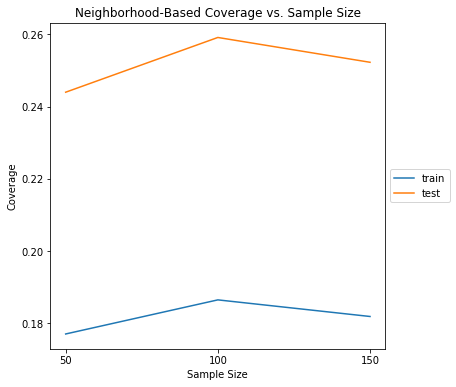

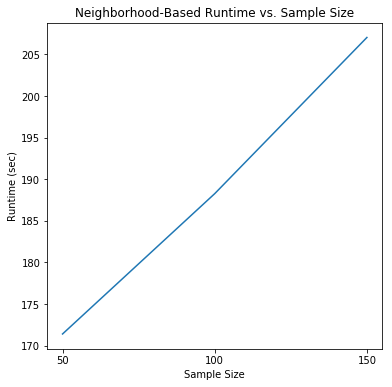

In [19]:
label = ['train', 'test']

nb_rmse = nb_result[['rmse_train', 'rmse_test']]
plot_lines(nb_result.sample_size, nb_rmse, 'Neighborhood-Based RMSE vs. Sample Size', 'Sample Size', 'RMSE', label)

nb_precision = nb_result[['top_k_precision_train', 'top_k_precision_test']]
plot_lines(nb_result.sample_size, nb_precision, 'Neighborhood-Based Precision vs. Sample Size', 'Sample Size', 'Precision', label)

nb_coverage = als_result[['coverage_train', 'coverage_test']]
plot_lines(nb_result.sample_size, nb_coverage, 'Neighborhood-Based Coverage vs. Sample Size', 'Sample Size', 'Coverage', label)

nb_runtime = nb_result[['runtime']]
plot_lines(nb_result.sample_size, nb_runtime, 'Neighborhood-Based Runtime vs. Sample Size', 'Sample Size', 'Runtime (sec)')

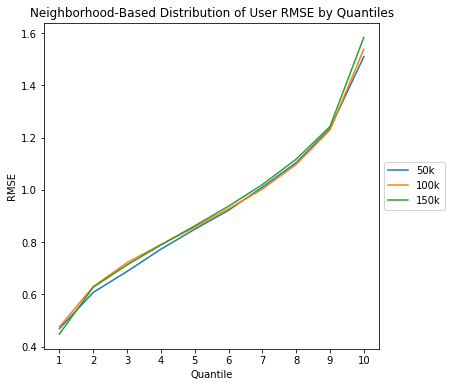

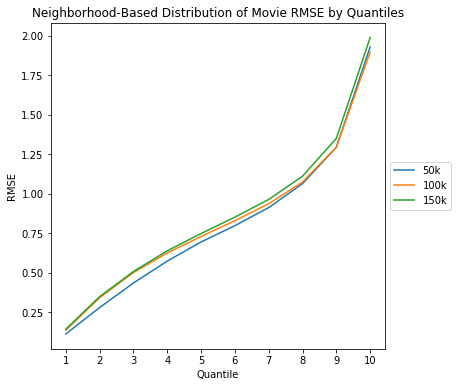

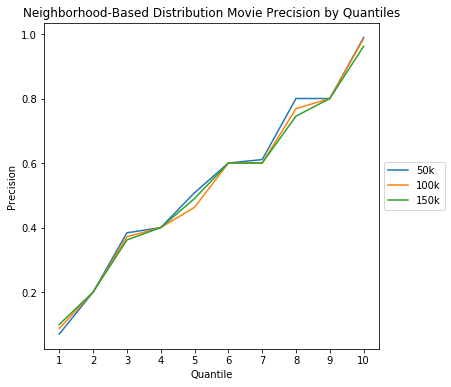

In [36]:
# RMSE user movies of NB

with open(path_nb_50k_dist_rmse_user, 'rb') as f:
    nb_50k_dist_rmse_user = pickle.load(f)

with open(path_nb_100k_dist_rmse_user, 'rb') as f:
    nb_100k_dist_rmse_user = pickle.load(f)
    
with open(path_nb_150k_dist_rmse_user, 'rb') as f:
    nb_150k_dist_rmse_user = pickle.load(f)
    
with open(path_nb_50k_dist_rmse_movie, 'rb') as f:
    nb_50k_dist_rmse_movie = pickle.load(f)
    
with open(path_nb_100k_dist_rmse_movie, 'rb') as f:
    nb_100k_dist_rmse_movie = pickle.load(f)
    
with open(path_nb_150k_dist_rmse_movie, 'rb') as f:
    nb_150k_dist_rmse_movie = pickle.load(f)
    
with open(path_nb_50k_dist_precision_movie, 'rb') as f:
    nb_50k_dist_precision_movie = pickle.load(f)
    
with open(path_nb_100k_dist_precision_movie, 'rb') as f:
    nb_100k_dist_precision_movie = pickle.load(f)
    
with open(path_nb_150k_dist_precision_movie, 'rb') as f:
    nb_150k_dist_precision_movie = pickle.load(f)
    
user_rmse_quantile = pd.concat([create_quantile_bucket(nb_50k_dist_rmse_user[0], QUANTILES), 
                     create_quantile_bucket(nb_100k_dist_rmse_user[0], QUANTILES), 
                     create_quantile_bucket(nb_150k_dist_rmse_user[0], QUANTILES)], axis=1).reset_index(drop=True)

movie_rmse_quantile = pd.concat([create_quantile_bucket(nb_50k_dist_rmse_movie[0], QUANTILES), 
                      create_quantile_bucket(nb_100k_dist_rmse_movie[0], QUANTILES),
                      create_quantile_bucket(nb_150k_dist_rmse_movie[0], QUANTILES)], axis=1).reset_index(drop=True)
    
movie_precision_quantile = pd.concat([create_quantile_bucket(nb_50k_dist_precision_movie[0], QUANTILES), 
                            create_quantile_bucket(nb_100k_dist_precision_movie[0], QUANTILES),
                            create_quantile_bucket(nb_150k_dist_precision_movie[0], QUANTILES)], axis=1).reset_index(drop=True)

legend_lab = ['50k', '100k', '150k']
q_lab = np.arange(QUANTILES)+1

plot_lines(q_lab, user_rmse_quantile, 'Neighborhood-Based Distribution of User RMSE by Quantiles', 'Quantile', 'RMSE', legend_lab)
plot_lines(q_lab, movie_rmse_quantile, 'Neighborhood-Based Distribution of Movie RMSE by Quantiles', 'Quantile', 'RMSE', legend_lab)
plot_lines(q_lab, movie_precision_quantile, 'Neighborhood-Based Distribution Movie Precision by Quantiles', 'Quantile', 'Precision', legend_lab)

#### Model-Based

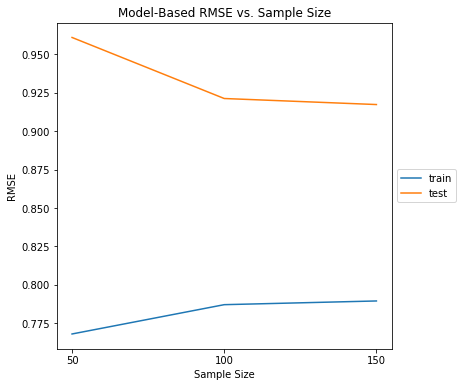

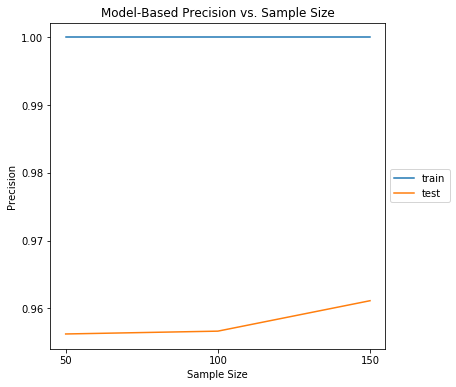

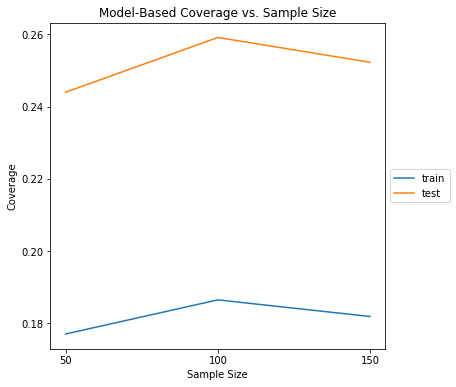

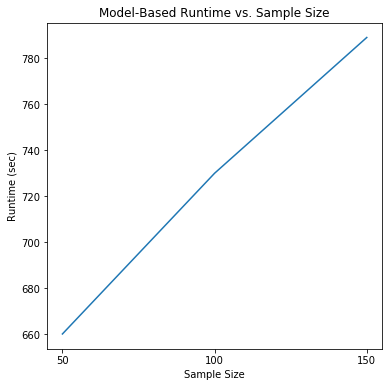

In [25]:
label = ['train', 'test']

als_rmse = als_result[['rmse_train', 'rmse_test']]
plot_lines(als_result.sample_size, als_rmse, 'Model-Based RMSE vs. Sample Size', 'Sample Size', 'RMSE', label)

als_precision = als_result[['top_k_precision_train', 'top_k_precision_test']]
plot_lines(als_result.sample_size, als_precision, 'Model-Based Precision vs. Sample Size', 'Sample Size', 'Precision', label)

als_coverage = als_result[['coverage_train', 'coverage_test']]
plot_lines(als_result.sample_size, als_coverage, 'Model-Based Coverage vs. Sample Size', 'Sample Size', 'Coverage', label)

als_runtime = als_result[['runtime']]
plot_lines(als_result.sample_size, als_runtime, 'Model-Based Runtime vs. Sample Size', 'Sample Size', 'Runtime (sec)')

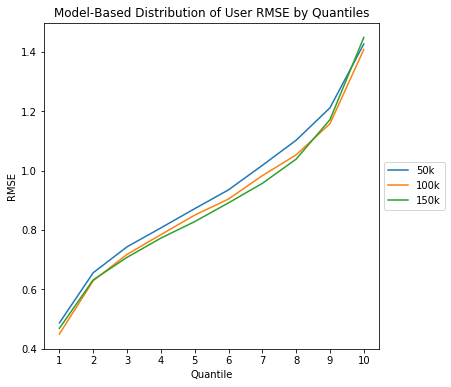

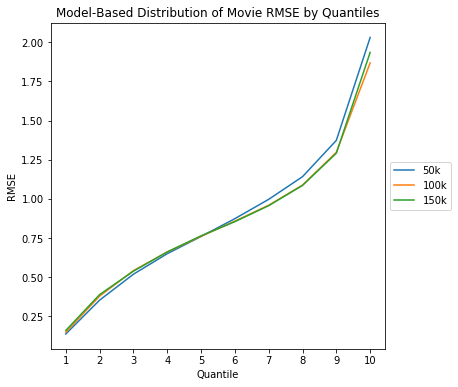

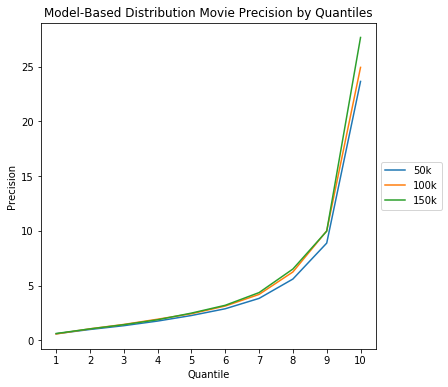

In [40]:
# RMSE user movies of ALS

with open(path_als_50k_dist_rmse_user, 'rb') as f:
    als_50k_dist_rmse_user = pickle.load(f)

with open(path_als_100k_dist_rmse_user, 'rb') as f:
    als_100k_dist_rmse_user = pickle.load(f)
    
with open(path_als_150k_dist_rmse_user, 'rb') as f:
    als_150k_dist_rmse_user = pickle.load(f)
    
with open(path_als_50k_dist_rmse_movie, 'rb') as f:
    als_50k_dist_rmse_movie = pickle.load(f)
    
with open(path_als_100k_dist_rmse_movie, 'rb') as f:
    als_100k_dist_rmse_movie = pickle.load(f)
    
with open(path_als_150k_dist_rmse_movie, 'rb') as f:
    als_150k_dist_rmse_movie = pickle.load(f)
    
with open(path_als_50k_dist_precision_movie, 'rb') as f:
    als_50k_dist_precision_movie = pickle.load(f)
    
with open(path_als_100k_dist_precision_movie, 'rb') as f:
    als_100k_dist_precision_movie = pickle.load(f)
    
with open(path_als_150k_dist_precision_movie, 'rb') as f:
    als_150k_dist_precision_movie = pickle.load(f)
    
user_rmse_quantile = pd.concat([create_quantile_bucket(als_50k_dist_rmse_user[0], QUANTILES), 
                     create_quantile_bucket(als_100k_dist_rmse_user[0], QUANTILES), 
                     create_quantile_bucket(als_150k_dist_rmse_user[0], QUANTILES)], axis=1).reset_index(drop=True)

movie_rmse_quantile = pd.concat([create_quantile_bucket(als_50k_dist_rmse_movie[0], QUANTILES), 
                      create_quantile_bucket(als_100k_dist_rmse_movie[0], QUANTILES),
                      create_quantile_bucket(als_150k_dist_rmse_movie[0], QUANTILES)], axis=1).reset_index(drop=True)
    
movie_precision_quantile = pd.concat([create_quantile_bucket(als_50k_dist_precision_movie[0], QUANTILES), 
                            create_quantile_bucket(als_100k_dist_precision_movie[0], QUANTILES),
                            create_quantile_bucket(als_150k_dist_precision_movie[0], QUANTILES)], axis=1).reset_index(drop=True)

legend_lab = ['50k', '100k', '150k']
q_lab = np.arange(QUANTILES)+1

plot_lines(q_lab, user_rmse_quantile, 'Model-Based Distribution of User RMSE by Quantiles', 'Quantile', 'RMSE', legend_lab)
plot_lines(q_lab, movie_rmse_quantile, 'Model-Based Distribution of Movie RMSE by Quantiles', 'Quantile', 'RMSE', legend_lab)
plot_lines(q_lab, movie_precision_quantile, 'Model-Based Distribution Movie Precision by Quantiles', 'Quantile', 'Precision', legend_lab)

### Comparison of Hyper Parameter Tuning

#### Neighborhood-Based: Increasing K-Neighbors

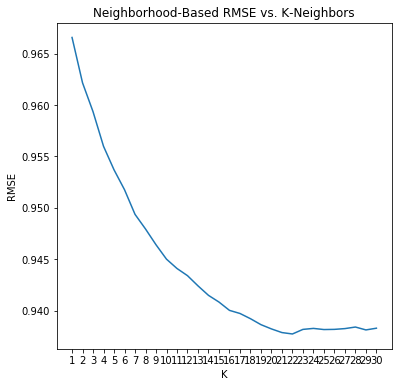

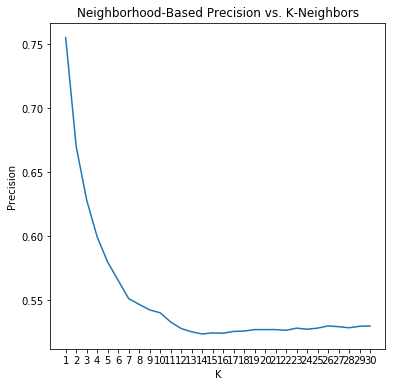

In [26]:
with open(path_nb_100k_hyper_rmse, 'rb') as f:
    nb_100k_hyper_rmse = pickle.load(f)
    
with open(path_nb_100k_hyper_precision, 'rb') as f:
    nb_100k_hyper_precision = pickle.load(f)

k = nb_100k_hyper_rmse[1].values
rmse = nb_100k_hyper_rmse[2].values
precision = nb_100k_hyper_precision[2].values
    
plot_lines(k, rmse, 'Neighborhood-Based RMSE vs. K-Neighbors', 'K', 'RMSE')
plot_lines(k, precision, 'Neighborhood-Based Precision vs. K-Neighbors', 'K', 'Precision')

In [27]:
min_rmse_idx = np.argmin(rmse)
best_k = k[min_rmse_idx]
lowest_RMSE = rmse[min_rmse_idx]
print("K of {0} looks to be the result with the lowest RMSE ({1}) on the test data."
      .format(round(best_k,4), round(lowest_RMSE,4)))

max_precision_idx = np.argmax(precision)
best_k = k[max_precision_idx]
highest_precision = precision[max_precision_idx]
print("K of {0} looks to be the result with the highest precision ({1}) on the test data."
      .format(round(best_k,4), round(highest_precision,4)))

K of 22 looks to be the result with the lowest RMSE (0.9377) on the test data.
K of 1 looks to be the result with the highest precision (0.7552) on the test data.


#### Model-Based: Increasing Regularization Parameter (λ)

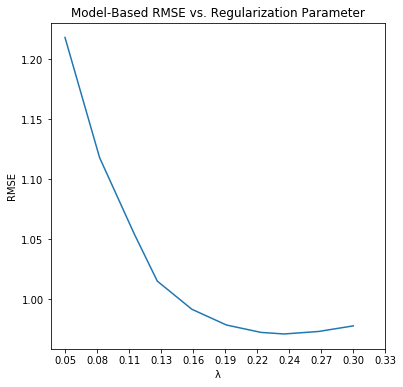

In [28]:
with open(path_als_100k_hyper_rmse, 'rb') as f:
    als_100k_hyper_rmse = pickle.load(f)

lam_cv = als_100k_hyper_rmse[1].values
rmse_cv = als_100k_hyper_rmse[2].values

param_size = int(len(lam_cv)/CV_K_FOLDS)
lam = lam_cv[:param_size]
rmse_per_kfold = np.array_split(rmse_cv, CV_K_FOLDS)
rmse = np.mean(rmse_per_kfold, axis=0)

plot_lines(lam, rmse, 'Model-Based RMSE vs. Regularization Parameter', 'λ', 'RMSE')

In [29]:
min_rmse_idx = np.argmin(rmse)
best_lamda = lam[min_rmse_idx]
lowest_RMSE = rmse[min_rmse_idx]
print("Lambda of {0} looks to be the result with the lowest RMSE ({1}) on the test data."
      .format(round(best_lamda,4), round(lowest_RMSE,4)))

Lambda of 0.24 looks to be the result with the lowest RMSE (0.9709) on the test data.


- Discuss here
- missing precision need to explain


### Comparison of Number of Movie Ratings

## Implementation Considerations

As a business looking to employ one of these methods into real-world use, should consider the following:

#### Cold Start

In the case the business has no existing user-item recommendation data, the company can ensure a randomized selection of 

#### New Users

With no existing data, it is question on how to provide an appropriate recommendation for new users. We suggest an employing a popularity-based approach (i.e. suggesting the top-k most popular items) as it has been shown to provide a decent performance vs. the methods incorporating user data. The business can continue to approach until the user has accumulated [X] movie interactions at which the predictions can be reliably estimated.

#### Online vs. Offline

Recommend matrix factorization for online methods as it provides a good enough estimate and scalable in memory.





In [30]:
#plot here

Eval criteria: Imagine a future employer looking at this repository. They would evaluate your project based
on the solution’s accuracy and your technical prowess, but they would also look for coherence
and creativity. An employer would look for thoughtfulness and thoroughness; for example, how
does the solution scale, were the hyper parameters tuned, will this solution discover novel
recommendations, etc. Are the major contributions of your work clear? Did you call out
important caveats?


Eval Criteria: Treat this as a case study and think about it from a business perspective. Imagine that you work
for a digital media company that needs to recommend movies. What is your objective? What are
you trying to optimizing and what are you willing to sacrifice? This framework and these
decisions should be clear in your report

Start developing with a small data set (e.g. < 10,000 users / < 1,000 items). Be very thoughtful
about how you sample your data. For example, do you care about choosing popular items or
unpopular items? Do you care about how many items a user has rated? If you just sample the
raw data in your downloaded file, will you be missing relevant data for samples users or items?



User rated multiple movies as top, topk precision what to pick?


## References
1: https://towardsdatascience.com/precision-vs-recall-386cf9f89488

# Appendix